# **Step 1: Importing Libraries**

### Importing the necessary libraries for data manipulation, visualization, machine learning, and evaluation.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# **Step 2: Loading Data and Enhanced EDA**
### Loading the dataset from a CSV file and performing exploratory data analysis to understand the data structure and identify any missing values.

In [ ]:
# Load the data
file_path = '/content/tested.csv'  # Update with the actual file path
df = pd.read_csv(file_path)

# Enhanced EDA
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print("\nSummary statistics of the dataset:")
df.describe()


Summary statistics of the dataset:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
print("\nMissing values in the dataset:")
df.isnull().sum()


Missing values in the dataset:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# **Step 3: Visualizing Data**

### Creating visualizations to understand the distribution of data for various features.

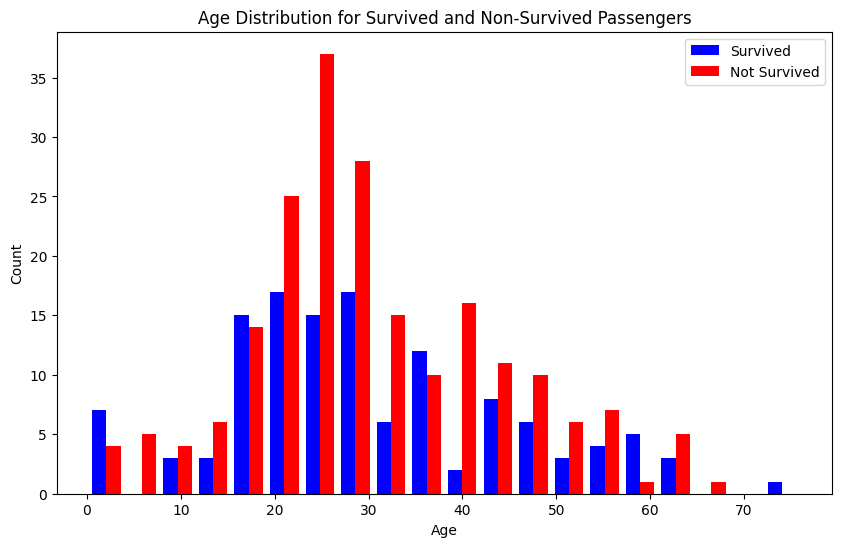

In [ ]:
# Visualize Age Distribution for Survived and Non-Survived Passengers
plt.figure(figsize=(10, 6))
plt.hist([df[df['Survived'] == 1]['Age'],
          df[df['Survived'] == 0]['Age']],
         bins=20, color=['blue', 'red'], label=['Survived', 'Not Survived'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution for Survived and Non-Survived Passengers')
plt.legend()
plt.show()

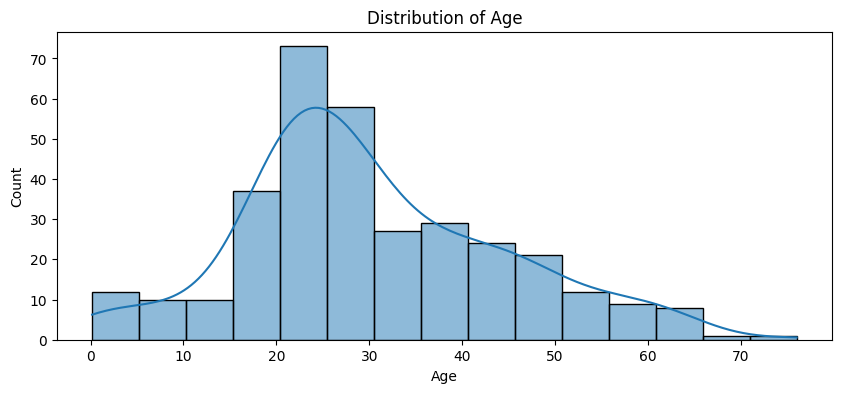

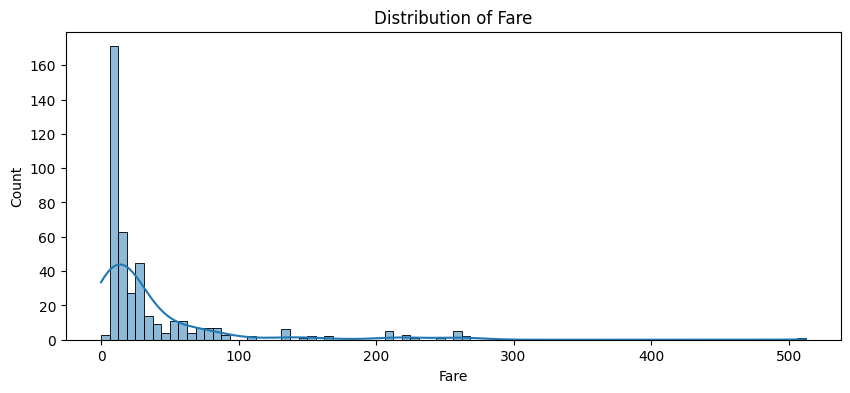

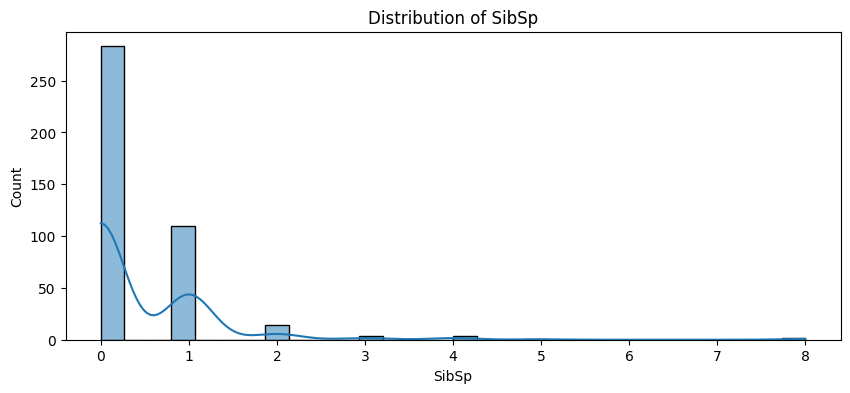

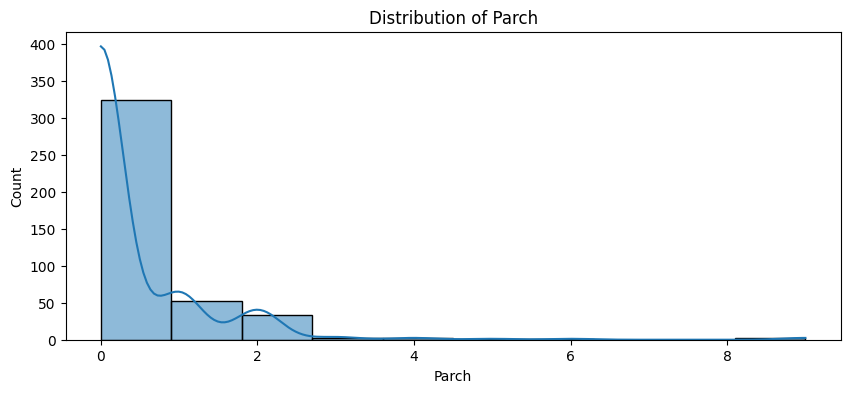

In [ ]:
# Visualizing the distribution of numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

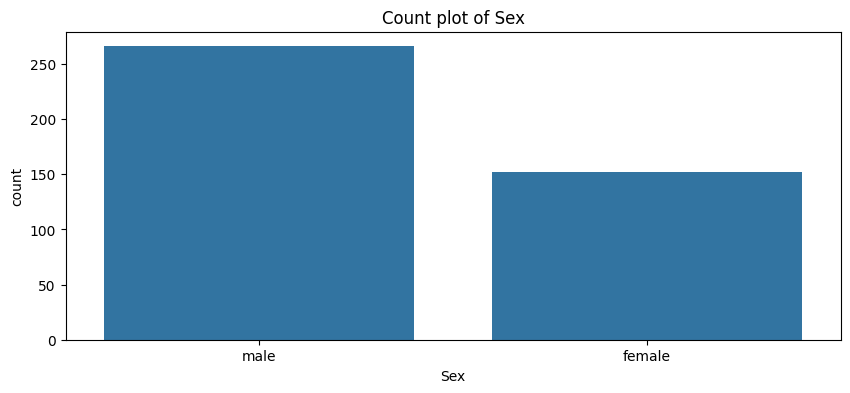

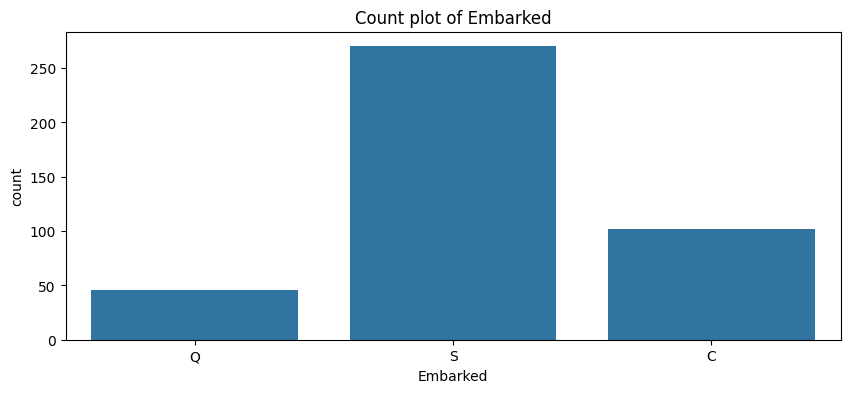

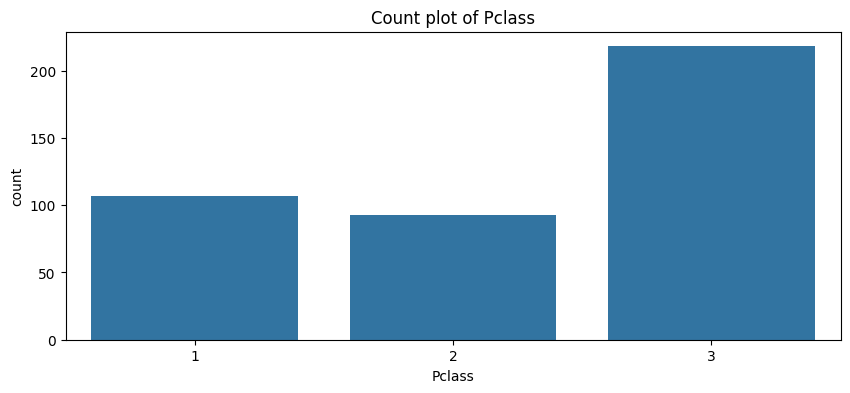

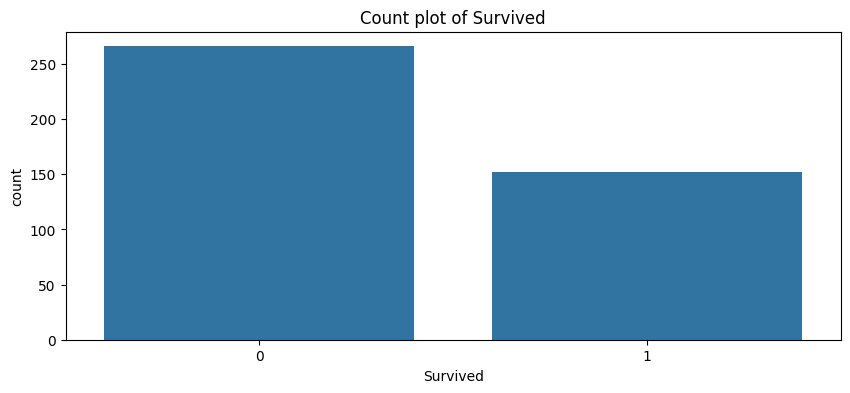

In [ ]:
# Visualizing categorical features
categorical_features = ['Sex', 'Embarked', 'Pclass', 'Survived']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count plot of {feature}')
    plt.show()

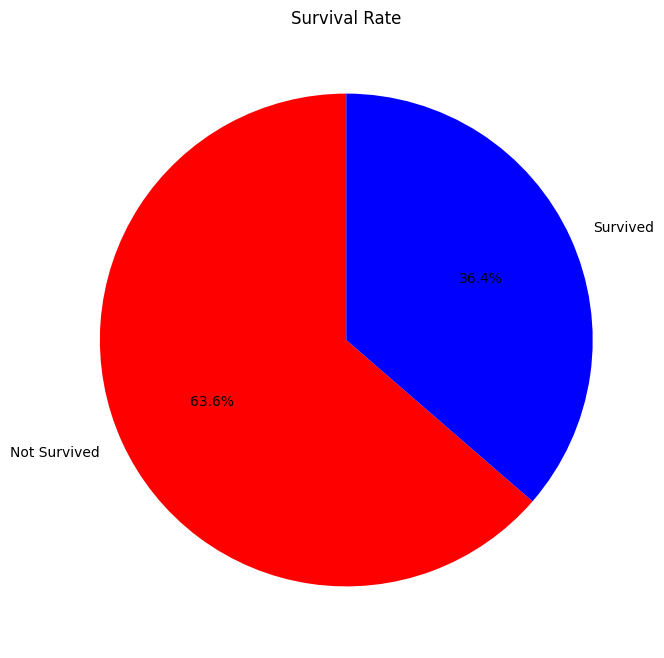

In [ ]:
# Pie chart for Survived
plt.figure(figsize=(8, 8))
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['red', 'blue'], labels=['Not Survived', 'Survived'])
plt.title('Survival Rate')
plt.ylabel('')
plt.show()

# **Step 4: Handling Missing Values and Encoding Categorical Features**

### Filling missing values and encoding categorical variables.

In [ ]:
# Handling missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encoding categorical features
df['Embarked'] = df['Embarked'].map({'Q': 0, 'S': 1, 'C': 2}).astype(int)
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0}).astype(int)

# Converting data types
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

# Dropping unnecessary columns
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)


# **Step 5: Correlation Heatmap**

### Creating a heatmap to visualize the correlation between features.

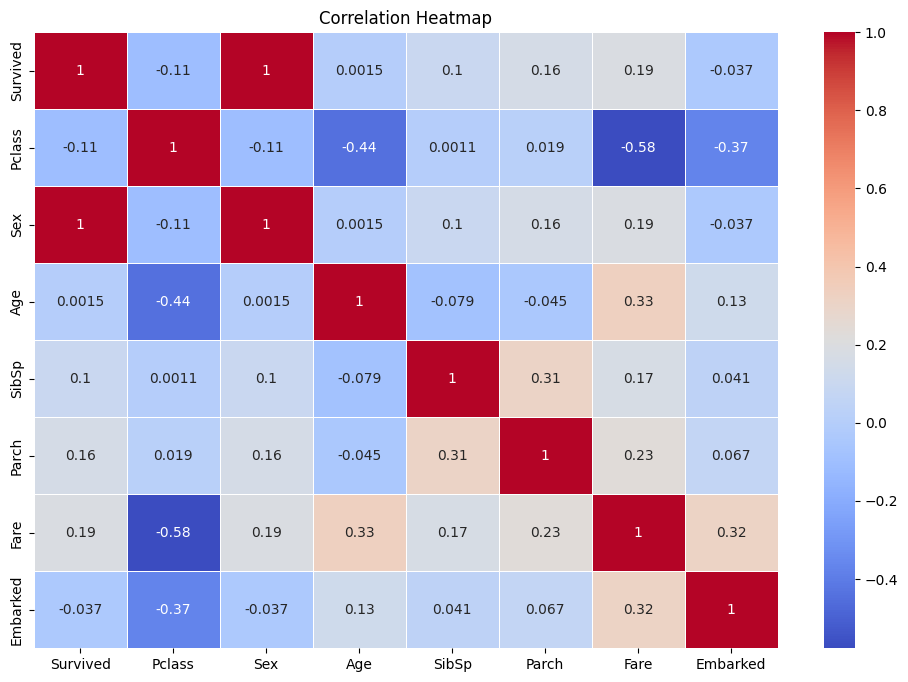

In [ ]:
# Correlation heatmap (ensure only numeric columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# **Step 6: Preparing Data for Modeling**
### Splitting the dataset into features (X) and target variable (y), and further splitting into training and testing sets.

In [ ]:
# Preparing data for modeling
X = df.drop('Survived', axis=1)
y = df['Survived']

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define a scaler
scaler = StandardScaler()


# **Step 7: Model Training and Evaluation**
### Training various models and evaluating their performance using accuracy, F1 score, and ROC AUC score.

In [ ]:
# Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('scaler', scaler), ('classifier', model)])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    y_pred_proba = pipeline.predict_proba(x_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    })

    print(f'{model_name} accuracy: {accuracy:.2f}')
    print(f'{model_name} F1 score: {f1:.2f}')
    print(f'{model_name} ROC AUC score: {roc_auc:.2f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('\n')


Logistic Regression accuracy: 1.00
Logistic Regression F1 score: 1.00
Logistic Regression ROC AUC score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

[[58  0]
 [ 0 26]]


Decision Tree accuracy: 1.00
Decision Tree F1 score: 1.00
Decision Tree ROC AUC score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

[[58  0]
 [ 0 26]]


SVM accuracy: 0.99
SVM F1 score: 0.98
SVM ROC AUC score: 1.00
              precision    recall  f1-sc

# **Step 8: Displaying Results**
### Creating a DataFrame to display the results of the models.

In [ ]:
# Displaying results in a DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df)


Model Performance Comparison:
                 Model  Accuracy  F1 Score  ROC AUC Score
0  Logistic Regression  1.000000  1.000000       1.000000
1        Decision Tree  1.000000  1.000000       1.000000
2                  SVM  0.988095  0.981132       0.998674
3        Random Forest  1.000000  1.000000       1.000000
4  K-Nearest Neighbors  0.988095  0.980392       0.999337
5    Gradient Boosting  1.000000  1.000000       1.000000


# **Step 9: Cross-Validation**

### Performing cross-validation to evaluate the performance of Logistic Regression and Random Forest models.

In [ ]:
# Cross-Validation
lr = Pipeline(steps=[('scaler', scaler), ('classifier', LogisticRegression(solver='liblinear', max_iter=200))])
cv_scores = cross_val_score(lr, X, y, cv=5)
print(f'Logistic Regression Cross-Validation Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}')

rf = Pipeline(steps=[('scaler', scaler), ('classifier', RandomForestClassifier())])
cv_scores = cross_val_score(rf, X, y, cv=5)
print(f'Random Forest Cross-Validation Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}')


Logistic Regression Cross-Validation Accuracy: 1.00 ± 0.00
Random Forest Cross-Validation Accuracy: 1.00 ± 0.00


# **Step 10: Learning Curves**

### Plotting learning curves to understand how the models perform with varying amounts of training data.

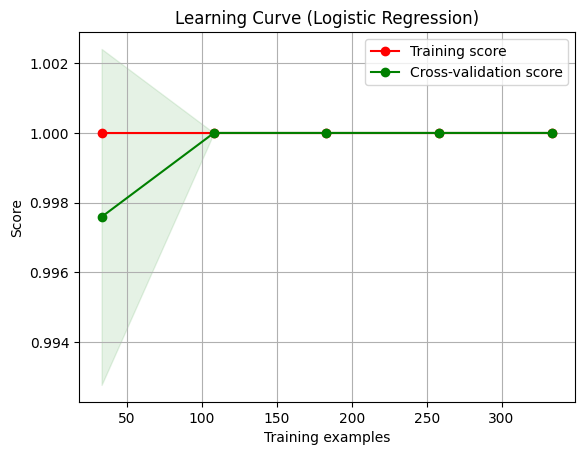

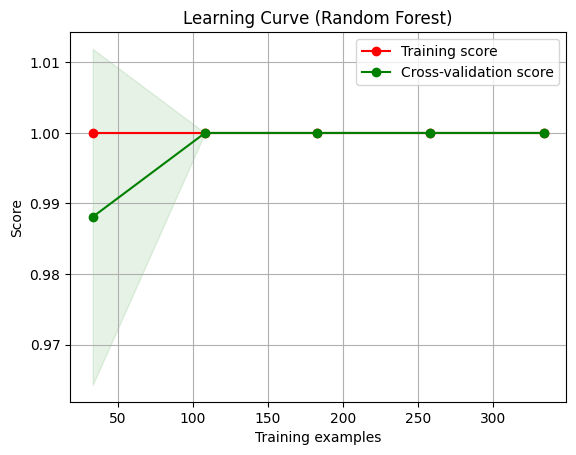

In [ ]:
# Learning Curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for Logistic Regression
plot_learning_curve(lr, "Learning Curve (Logistic Regression)", X, y, cv=5)
plt.show()

# Plot learning curves for Random Forest
plot_learning_curve(rf, "Learning Curve (Random Forest)", X, y, cv=5)
plt.show()


# **Step 11: Feature Importance for Random Forest**

### Identifying and visualizing the importance of features in the Random Forest model.

Feature ranking:
1. feature Sex (0.857292486983048)
2. feature Fare (0.04998556969747229)
3. feature Age (0.030403741035314392)
4. feature Parch (0.021052160398694845)
5. feature Embarked (0.017918459753968368)
6. feature SibSp (0.014631744351590651)
7. feature Pclass (0.008715837779911473)


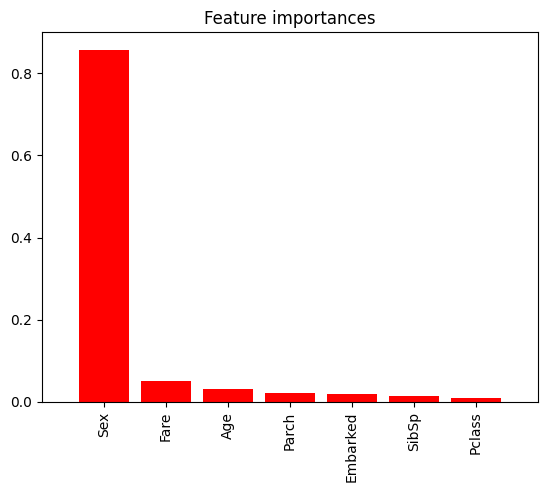

In [ ]:
# Feature Importance for Random Forest
rf_model = RandomForestClassifier()
rf_pipeline = Pipeline(steps=[('scaler', scaler), ('classifier', rf_model)])
rf_pipeline.fit(x_train, y_train)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {features[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


# **Step 12: Hyperparameter Tuning**
### Performing hyperparameter tuning for the Random Forest model using GridSearchCV.

In [ ]:
# Hyperparameter tuning for the best model (Random Forest in this case)
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=Pipeline(steps=[('scaler', scaler), ('classifier', RandomForestClassifier())]), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(x_test)[:, 1])

print(f'Best Random Forest accuracy: {accuracy:.2f}')
print(f'Best Random Forest F1 score: {f1:.2f}')
print(f'Best Random Forest ROC AUC score: {roc_auc:.2f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Random Forest accuracy: 1.00
Best Random Forest F1 score: 1.00
Best Random Forest ROC AUC score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

[[58  0]
 [ 0 26]]


# Conclusion

### This process provides a detailed approach to understanding, visualizing, and modeling a dataset. By employing multiple models, evaluating their performance, and tuning hyperparameters, you can effectively build and optimize machine learning models for classification tasks.